In [2]:
# Imports all the libraries required
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import geopy
from matplotlib.colors import rgb2hex
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
from collections import Counter

In [3]:
df = pd.read_csv('cleaned_twitter_data_50000_sample.csv', index_col=0)
df.head()

,initial_index,tweet_created_at,user_created_at,text,user_id,user_name,followers_count,friends_count,user_lang,place_type,place_full_name,place_bounding_box,country,tweet_lang,retweet_count,favorite_count,states,candidate
439298,560631,2016-09-08 13:56:16+00:00,Sat May 16 17:31:28 +0000 2009,"['hillaryclinton', 'hit', 'one', 'reporter']",40504632,joey gerdin,542,596,en,city,"Minneapolis, MN","{'type': 'Polygon', 'coordinates': [[[-93.3295...",United States,en,0,0,Minnesota,clinton
326531,417258,2016-09-01 09:31:56+00:00,Tue Oct 26 17:08:21 +0000 2010,"['hillaryclinton', 'false', 'said', 'first', '...",208110094,M_Mexico_Great_Again,643,523,en,city,"Ferry Pass, FL","{'type': 'Polygon', 'coordinates': [[[-87.2476...",United States,en,0,0,Florida,clinton
313954,400256,2016-08-31 23:16:48+00:00,Wed Dec 14 05:41:00 +0000 2011,"['hillaryclinton', 'blew', 'invitation', 'pres...",436442356,Chris Harms,522,492,en,admin,"Wisconsin, USA","{'type': 'Polygon', 'coordinates': [[[-92.8894...",United States,en,0,0,Wisconsin,clinton
450210,573828,2016-09-08 23:21:16+00:00,Mon Aug 08 21:35:38 +0000 2016,"['usaneedstrump', 'hillaryclinton', 'dailycall...",762764227052392449,FrankB,5,72,en,admin,"Pennsylvania, USA","{'type': 'Polygon', 'coordinates': [[[-80.5198...",United States,en,0,0,Pennsylvania,clinton
182803,230748,2016-08-23 17:40:01+00:00,Wed Feb 17 16:55:49 +0000 2010,"['trump', 'tempcrab', 'orchard', 'ky', 'f', 'w...",115110145,Carl King,84,18,en,admin,"Kentucky, USA","{'type': 'Polygon', 'coordinates': [[[-89.5715...",United States,en,0,0,Kentucky,trump


In [5]:
id_instances = df['user_name'].tolist()
print(id_instances[:10])

# All unique ID strings, aka all unique users in the dataset
IDs = Counter(id_instances).keys()

# Counts the number of occurences of every ID.
tweet_frequency = Counter(id_instances).values()

['joey gerdin', 'M_Mexico_Great_Again', 'Chris Harms', 'FrankB', 'Carl King', 'linda in GA no gmo', 'Jason T', 'Cynthia Foust', 'Alex Hoss', 'Johanna Gard']


In [90]:
user_freq = dict(zip(IDs, tweet_frequency))
print(user_freq)

{'Red Octopus': 76, 'Beverly Spence': 448, 'Asa DeMatteo, Ph.D.': 58, 'Rafael Alejandro': 31, 'tom b': 69, 'Kim Wasson': 45, 'Mechadave': 164, 'David Mills': 2, 'robert troxel': 1, 'Brewgan': 9, 'Michael Varvel': 56, 'C.C.': 93, 'Extremely Careless': 7, 'Ellen': 50, "It's Me, Greg!": 86, 'William Kath': 14, 'Herman Sims': 179, 'Ron Joseph(NYOC)': 38, 'Mike Nellis': 3, 'Mike Carlson': 50, 'Richard CoeurdeLion': 274, 'Jerry lamb': 10, 'Stephen C. Rose': 4, 'Matt Butler': 1, 'Jon Angel': 12, 'Michael Cohen': 73, 'Amanda Ferguson': 1, 'Joseph Polsinello': 629, 'SOCIAL BUTTRFLY RN': 52, 'Debra Coreno': 24, 'In My Element': 77, 'Nancy Earley': 19, 'Deborah Barnett Jump': 1, 'Mariano Q. Casilum': 244, 'Gary M. Corigliano': 1, 'louise lloyd': 10, 'Jules': 18, 'Dagmar Christa Veen': 2, 'GIL DUPUY': 111, 'michelle sakasewa': 14, 'Susan #BernieOrBust': 21, 'Misti Jackson': 271, 'LL Garrett': 101, 'Michael Arendt': 26, 'Jan Lella': 8, 'maureen s': 27, 'ベンソン.ベニ': 9, 'skandali': 2, 'Linda JustaNygir

In [6]:
unique_users2 = pd.DataFrame(data=IDs, index=None, columns =['ID'])
unique_users2['tweet_frequency'] = tweet_frequency


#followers_count = df['followers_count'].tolist()
#followers_count[:10]

In [13]:
#unique_users = pd.DataFrame(data=id_instances, index=None, columns =['ID'])
#unique_users['followers_count'] = followers_count
#unique_users.sort_values(['ID'], axis=1, inplace=True)

#unique_users.drop_duplicates(subset = "ID", keep = False, inplace = True)
#unique_users['unique_tweets'] = tweet_frequency
user_dict = {}

for row in range(df.shape[0]):
    if (df.iloc[row, 5]) not in user_dict.keys():
        user_dict[df.iloc[row, 5]] = []
        user_dict[df.iloc[row, 5]].append(df.iloc[row, 6])
    else:
        user_dict[df.iloc[row, 5]].append(df.iloc[row, 6])
        


# data.drop_duplicates(subset ="First Name", keep = False, inplace = True) 

In [17]:
user_dict_followers = {}
user_dict_info_followers = []
# mean, median, standard
for k,v in user_dict.items():
    v = np.array(v)
    user_dict_avg_followers[k] = np.mean(v)
    
    

In [18]:
print(user_dict_avg_followers)

{'joey gerdin': 545.0, 'M_Mexico_Great_Again': 649.8181818181819, 'Chris Harms': 522.0, 'FrankB': 378.5, 'Carl King': 84.32038834951456, 'linda in GA no gmo': 1696.3636363636363, 'Jason T': 70.93333333333334, 'Cynthia Foust': 676.0, 'Alex Hoss': 483.0, 'Johanna Gard': 76.61111111111111, 'Timothy Imholt': 502.625, 'J W Thiessen': 194.0, 'Emelson Salazar': 146.17619047619047, 'Linda': 210.81690140845072, 'molly day': 481.1875, 'Diana Dee': 4000.8571428571427, 'Kelly Allen': 717.0, 'T Gard': 3029.38, 'Leonard Shand': 1873.4444444444443, 'THEbigMike1978': 14.0, 'Joseph Carney': 57.0, 'Little Bennie': 137.0, 'Julie': 164.54545454545453, '(((RaymondBuckley)))': 4715.0, 'Claire Aronson': 1059.5714285714287, 'Julie Panebianco': 936.3333333333334, 'LEONES': 3.0, 'Patrick Reed': 27.944444444444443, 'paul norgiel': 300.0, 'Clinton/Kaine 2016': 457.3529411764706, 'Kae Brune': 1088.0, 'Sharon Dennis': 1063.857142857143, 'Olivia Kay': 4608.0, 'Kin Mapper': 72.05882352941177, 'Agent Haas': 974.272727

1010769.0
[2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623, 2267.6861138026625, 293.0, 16989.136363719623]


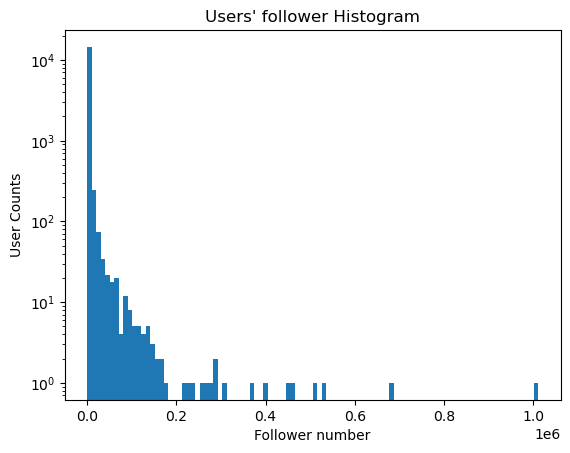

In [61]:
## how many followers per user (mean + mode + sd + graph)
user_info = np.array([v for v in user_dict_avg_followers.values()])
user_dict_info_followers.append(np.mean(user_info))
user_dict_info_followers.append(np.median(user_info))
user_dict_info_followers.append(np.std(user_info))
print(user_info.max())
print(user_dict_info_followers)

plt.hist(user_info, bins=100, log=True)
plt.title("Users' follower Histogram")
plt.xlabel('Follower number')
plt.ylabel('User Counts')
plt.show()


In [35]:
# retweets per tweet sorted on most retweets to least retweets (histogram/line plot x = tweets and the retweets y)
print(max(df.iloc[:,14]))

0


14992
51
{'California': 2110, 'Florida': 1330, 'New York': 1156, 'Texas': 875, 'Washington': 686, 'Illinois': 627, 'Georgia': 614, 'Pennsylvania': 551, 'North Carolina': 478, 'Arizona': 468, 'Massachusetts': 458, 'Ohio': 419, 'Michigan': 334, 'New Jersey': 324, 'Maryland': 317, 'Colorado': 299, 'Minnesota': 294, 'Tennessee': 279, 'Indiana': 252, 'Oregon': 202, 'Louisiana': 201, 'Nevada': 181, 'Virginia': 179, 'Alabama': 171, 'Missouri': 166, 'Wisconsin': 166, 'Oklahoma': 165, 'Kentucky': 158, 'South Carolina': 158, 'Kansas': 151, 'Iowa': 125, 'Nebraska': 106, 'Arkansas': 100, 'New Mexico': 95, 'Mississippi': 93, 'New Hampshire': 90, 'Utah': 79, 'Connecticut': 77, 'Maine': 65, 'Rhode Island': 64, 'Idaho': 58, 'Delaware': 53, 'Hawaii': 46, 'Alaska': 32, 'West Virginia': 28, 'Vermont': 26, 'Montana': 25, 'North Dakota': 22, 'Wyoming': 20, 'South Dakota': 17, 'District of Columbia': 2}


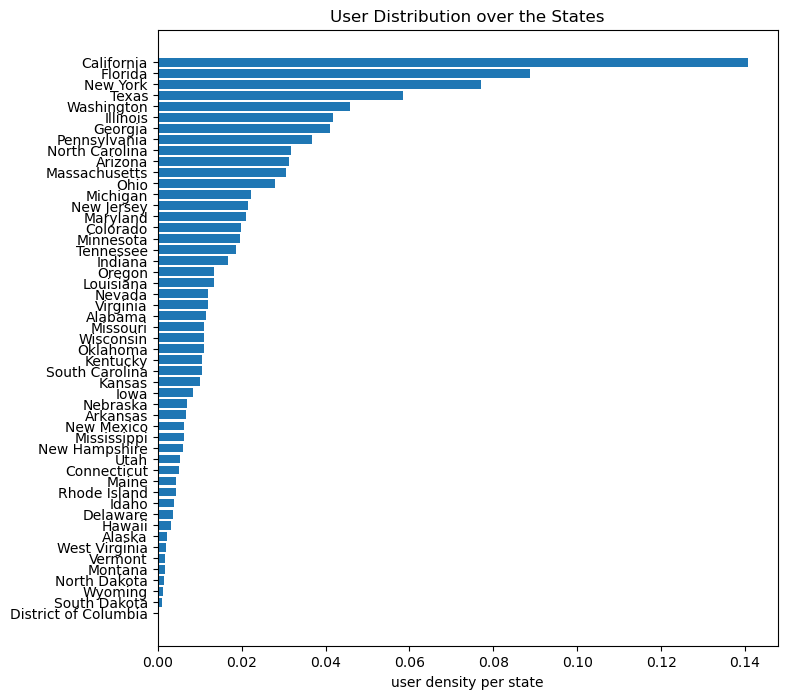

In [72]:
# how many users total per state (histogram)
users = set(df.iloc[:, 5])
states = set(df.iloc[:, 16])
print(len(users))
print(len(states))
user_per_states = {state: 0 for state in states}
for i in range(df.shape[0]):
    if df.iloc[i,5] in users:
        user_per_states[df.iloc[i,16]] += 1
        users.remove(df.iloc[i,5])
        
# print(user_per_states)
# {k: v for k, v in sorted(x.items(), key=lambda item: item[1])}
# user_per = sorted(user_per_states, key=lambda item: item[1], reverse=True)
user_per = {k: v for k,v in sorted(user_per_states.items(), key=lambda item: item[1], reverse=True)}
s = 0
for i in user_per.values():
    s += i
    
print(user_per)
# plt.bar(user_per_states.keys(), user_per_states.values(), color='g', )
# plt.title('how many users total per state')
# plt.show()


plt.rcdefaults()
fig, ax = plt.subplots(figsize=(8,8))
people = user_per.keys()
y_pos = np.arange(len(people))
num_per_states = [i/s for i in user_per.values()]

ax.barh(y_pos, num_per_states, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('user density per state')
ax.set_title('User Distribution over the States')

plt.show()


In [46]:
# followers, in the 'user' 'followers_count' field: checks each tweet until it matches the first unique entry listed
# in the IDs list, then puts that ID together with its followers in a dict. It then searches for the second unique
# user and fetches their followers.

x = 0 
for row in df:
    if df['unique_tweets_count'] == unique_users
df['unique_tweets_count'] = np.where(df['user_name'] == unique_users['ID'], unique_users['unique_tweets'], np.nan)

df.head()



ValueError: Can only compare identically-labeled Series objects

In [ ]:
x=0
for index, row in df.iterrows():
    if row['user_name'] == unique_users.iat[x,1]:
        row['unique_tweets_count'] = unique_users.iat[x,2]
        x += 1
    else:
        pass
df.head()
    
# Making a new column mapping the follower count onto the right user:
    
#id_data['followers'] = id_data['ID'].map(follower_count_dict)

    